3. How to make the best first impression in order to get more matches (and ultimately find love, or new friendships) ?





In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file1 = '/content/drive/MyDrive/Dating App Dataset/users_api-results.csv'
users_instances = pd.read_csv(file1)
users_instances

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,pictureId,userId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,F,M,21,B**f,0.85,1,280,15,0,0,...,1,2015-04-07T00:08:59Z,1.428365e+09,0,1.0,NaN,NaN,CRYqKLbQ1+pd5CVSmGGccV+EggT4oGRmaXWhnn5jhMg9Jz...,cb958a9459216acd4dd06f213fe63685,NaN
3969,F,M,20,Ma**e,1.00,8,1014,43,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3970,F,M,20,Ma**e,1.00,8,1101,46,3,0,...,1,2015-04-06T07:54:34Z,1.428307e+09,0,1.0,NaN,Marie ॐ 🎉Goa. ...,CRYVOrW7zgSV+NPGili4nZeREmQ0rAAXCZunTXp9KRLat1...,d5a7edbcb59fcb092871bdcde7f142ca,NaN
3971,F,M,23,Eni**n,0.96,8,8702,142,0,0,...,0,2015-04-06T15:47:15Z,1.428335e+09,0,1.0,NaN,ruhig shriebe😉. bissä ni,CRYsH4q+r4fCkC8+leJqDdJQtbUNQGCyqLx36aDsEzC5b9...,e532a6060fe4e5902c66086d905a9d53,NaN


In [ ]:
users_instances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3973 non-null   object 
 1   genderLooking           3973 non-null   object 
 2   age                     3973 non-null   int64  
 3   name                    3973 non-null   object 
 4   counts_details          3973 non-null   float64
 5   counts_pictures         3973 non-null   int64  
 6   counts_profileVisits    3973 non-null   int64  
 7   counts_kisses           3973 non-null   int64  
 8   counts_fans             3973 non-null   int64  
 9   counts_g                3973 non-null   int64  
 10  flirtInterests_chat     3973 non-null   bool   
 11  flirtInterests_friends  3973 non-null   bool   
 12  flirtInterests_date     3973 non-null   bool   
 13  country                 3973 non-null   object 
 14  city                    3686 non-null   

In [ ]:
users_instances = users_instances.query('age not in [18, 27, 28]')

In [ ]:
import numpy as np

def safe_divide_vectorized(numerator, denominator):
    return np.where(
        (numerator == 0) & (denominator == 0), 0,np.where(denominator == 0, 0, numerator / denominator))

users_instances["engagement_rate"] = np.round(
    safe_divide_vectorized(
        users_instances["counts_kisses"] + users_instances["counts_fans"],
        users_instances["counts_profileVisits"]
    ),
    2
)
users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")

users_instances["picture_effectiveness"] = np.round(
    safe_divide_vectorized(
        (users_instances["counts_kisses"] + users_instances["counts_fans"] ) ,
        users_instances["counts_pictures"]
        ),
   2)

users_instances["engagement_rate"] = pd.to_numeric(users_instances["engagement_rate"], errors="coerce")
users_instances["picture_effectiveness"] = pd.to_numeric(users_instances["picture_effectiveness"], errors="coerce")
users_instances["charisma_score"] = round(
    ((users_instances["engagement_rate"] * 0.6) + (users_instances["picture_effectiveness"] * 0.4)) / 2, 2
)

users_instances['is_charismatic'] = users_instances['charisma_score'] > users_instances['charisma_score'].median()
charismatic_users = users_instances[users_instances['is_charismatic'] == True]
non_charismatic_users = users_instances[users_instances['is_charismatic'] == False]

<ipython-input-6-9fe09efb4501>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = np.round(
<ipython-input-6-9fe09efb4501>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances["engagement_rate"] = users_instances["engagement_rate"].apply(lambda x: f"{x:.2f}")
<ipython-input-6-9fe09efb4501>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

# **How to make the best first impression in order to get more matches**

1. Profile Picture Analysis
- Hypothesis: Users with a profile picture are more likely to get profile visits, kisses, and fans.
- Implementation: Analyze the relationship between having a profile picture (pictureId) and engagement metrics such as counts_profileVisits, counts_kisses, and counts_fans.

In [ ]:
profile_pic_analysis = users_instances.groupby(users_instances['pictureId'].notnull())[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
profile_pic_analysis.rename(index={True: 'Has Picture', False: 'No Picture'}, inplace=True)

print("\n### Impact of Profile Pictures ###")
print(profile_pic_analysis)



### Impact of Profile Pictures ###
             counts_profileVisits  counts_kisses  counts_fans
pictureId                                                    
Has Picture           3710.706045     156.974811     2.346348


For charismatic users

In [ ]:
profile_pic_analysis = charismatic_users.groupby(charismatic_users['pictureId'].notnull())[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
profile_pic_analysis.rename(index={True: 'Has Picture', False: 'No Picture'}, inplace=True)

print("\n### Impact of Profile Pictures ###")
print(profile_pic_analysis)


### Impact of Profile Pictures ###
             counts_profileVisits  counts_kisses  counts_fans
pictureId                                                    
Has Picture           6528.125694     290.859162     4.191318


For non charismatic users

In [ ]:
profile_pic_analysis = non_charismatic_users.groupby(non_charismatic_users['pictureId'].notnull())[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
profile_pic_analysis.rename(index={True: 'Has Picture', False: 'No Picture'}, inplace=True)

print("\n### Impact of Profile Pictures ###")
print(profile_pic_analysis)


### Impact of Profile Pictures ###
             counts_profileVisits  counts_kisses  counts_fans
pictureId                                                    
Has Picture            904.618401      23.628959     0.508798


*   All the users has the pictures on their profiles,so thats why we will check the comparison between charismatic and non charismatic users
*   Charismatic users have 4 times more fans than non charismatic users



2. Timing - Be Active at the Right Times
- Hypothesis: Users active at certain times of the day are more likely to receive engagement.
- Implementation: Use lastOnlineTime and lastOnlineDate to analyze when users are online and correlate it with engagement metrics.

**All Users**

In [ ]:
users_instances['lastOnlineDate'] = pd.to_datetime(users_instances['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
users_instances['hour_of_day'] = users_instances['lastOnlineDate'].dt.hour
all_users_timing_analysis = users_instances.groupby('hour_of_day')[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

print("\n### Best Times to Be Active for All users ###")
print(all_users_timing_analysis)



### Best Times to Be Active for All users ###
             counts_profileVisits  counts_kisses  counts_fans
hour_of_day                                                  
0                     2981.735294     111.735294     3.588235
1                     5960.882353     196.588235     5.882353
2                     4724.608696     195.304348     1.956522
3                     3637.823529     114.000000     1.882353
4                     7553.625000     327.062500     1.437500
5                     4127.175000     154.900000     0.875000
6                     4704.169811     191.264151     0.754717
7                     5505.225806     245.548387     5.612903
8                     4249.402062     161.360825     0.670103
9                     3853.324324     155.513514     1.277027
10                    5602.296482     239.412060     2.783920
11                    5093.870690     222.186782     1.836207
12                    3717.031847     192.235669     3.318471
13                    5

<ipython-input-10-6730a1b3fc53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['lastOnlineDate'] = pd.to_datetime(users_instances['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
<ipython-input-10-6730a1b3fc53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_instances['hour_of_day'] = users_instances['lastOnlineDate'].dt.hour


**Charismatic Users**

In [ ]:
charismatic_users['lastOnlineDate'] = pd.to_datetime(charismatic_users['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
charismatic_users['hour_of_day'] = charismatic_users['lastOnlineDate'].dt.hour
charismatic_users_timing_analysis = charismatic_users.groupby('hour_of_day')[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

print("\n### Best Times to Be Active for Charismatic Users ###")
print(charismatic_users_timing_analysis)



### Best Times to Be Active for Charismatic Users ###
             counts_profileVisits  counts_kisses  counts_fans
hour_of_day                                                  
0                     5023.277778     194.055556     6.722222
1                    10777.714286     372.571429    14.000000
2                     9622.111111     448.888889     4.222222
3                     5579.300000     176.100000     3.100000
4                     9068.636364     431.454545     1.363636
5                     6134.615385     233.730769     1.230769
6                     8993.880000     383.880000     1.040000
7                     8916.428571     415.828571     9.342857
8                     6635.156863     275.137255     0.862745
9                     7602.809524     331.571429     2.158730
10                    8329.524194     366.588710     4.048387
11                    7900.059701     363.756219     2.820896
12                    5863.933333     315.500000     5.322222
13             

<ipython-input-11-6825364025fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charismatic_users['lastOnlineDate'] = pd.to_datetime(charismatic_users['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
<ipython-input-11-6825364025fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charismatic_users['hour_of_day'] = charismatic_users['lastOnlineDate'].dt.hour


**Non Charismatic Users**

In [ ]:
non_charismatic_users['lastOnlineDate'] = pd.to_datetime(non_charismatic_users['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
non_charismatic_users['hour_of_day'] = non_charismatic_users['lastOnlineDate'].dt.hour
non_charismatic_users_timing_analysis = non_charismatic_users.groupby('hour_of_day')[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()

print("\n### Best Times to Be Active for Non Charismatic Users ###")
print(non_charismatic_users_timing_analysis)



### Best Times to Be Active for Non Charismatic Users ###
             counts_profileVisits  counts_kisses  counts_fans
hour_of_day                                                  
0                      685.000000      19.125000     0.062500
1                     2589.100000      73.400000     0.200000
2                     1576.214286      32.285714     0.500000
3                      864.285714      25.285714     0.142857
4                     4220.600000      97.400000     1.600000
5                      399.071429       8.500000     0.214286
6                      874.071429      19.285714     0.500000
7                     1083.296296      24.814815     0.777778
8                     1604.326087      35.217391     0.456522
9                     1074.294118      25.023529     0.623529
10                    1093.280000      29.146667     0.693333
11                    1256.836735      28.612245     0.489796
12                     833.134328      26.656716     0.626866
13         

<ipython-input-12-db3d2a5b9312>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_charismatic_users['lastOnlineDate'] = pd.to_datetime(non_charismatic_users['lastOnlineDate'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
<ipython-input-12-db3d2a5b9312>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_charismatic_users['hour_of_day'] = non_charismatic_users['lastOnlineDate'].dt.hour


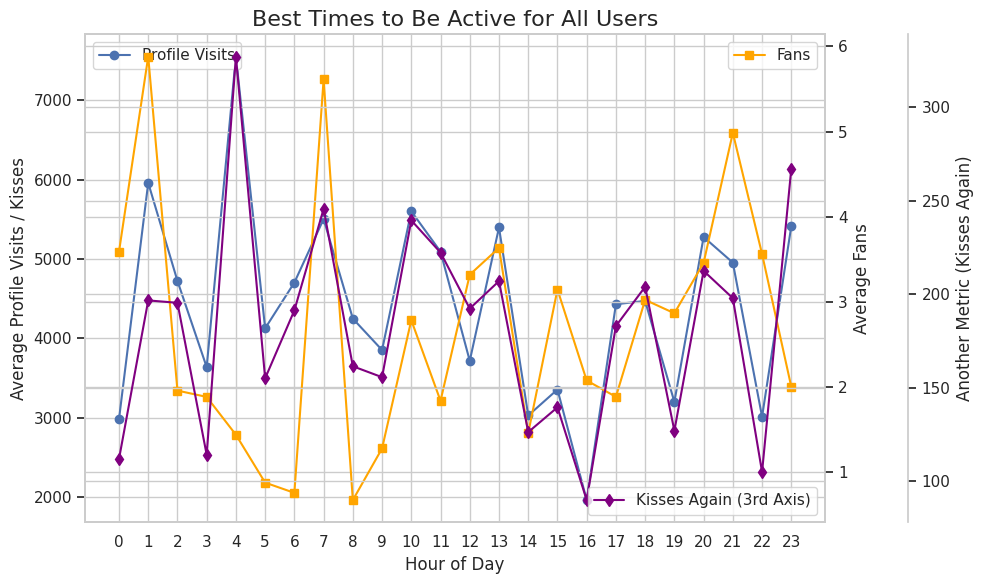

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(all_users_timing_analysis.index, all_users_timing_analysis['counts_profileVisits'], label='Profile Visits', color='b', marker='o')
ax2 = ax1.twinx()
ax2.plot(all_users_timing_analysis.index, all_users_timing_analysis['counts_fans'], label='Fans', color='orange', marker='s')
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(all_users_timing_analysis.index, all_users_timing_analysis['counts_kisses'], label='Kisses Again (3rd Axis)', color='purple', marker='d')

ax1.set_title("Best Times to Be Active for All Users", fontsize=16)
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_ylabel("Average Profile Visits / Kisses", fontsize=12)
ax2.set_ylabel("Average Fans", fontsize=12)
ax3.set_ylabel("Another Metric (Kisses Again)", fontsize=12)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="lower right")

ax1.set_xticks(range(24))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


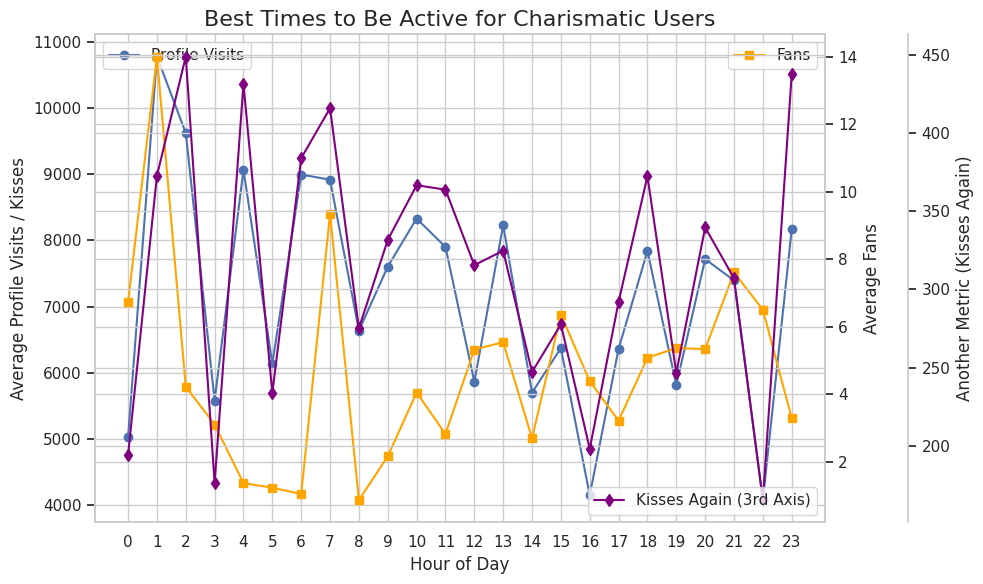

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(charismatic_users_timing_analysis.index, charismatic_users_timing_analysis['counts_profileVisits'], label='Profile Visits', color='b', marker='o')
ax2 = ax1.twinx()
ax2.plot(charismatic_users_timing_analysis.index, charismatic_users_timing_analysis['counts_fans'], label='Fans', color='orange', marker='s')
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(charismatic_users_timing_analysis.index, charismatic_users_timing_analysis['counts_kisses'], label='Kisses Again (3rd Axis)', color='purple', marker='d')

ax1.set_title("Best Times to Be Active for Charismatic Users", fontsize=16)
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_ylabel("Average Profile Visits / Kisses", fontsize=12)
ax2.set_ylabel("Average Fans", fontsize=12)
ax3.set_ylabel("Another Metric (Kisses Again)", fontsize=12)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="lower right")

ax1.set_xticks(range(24))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


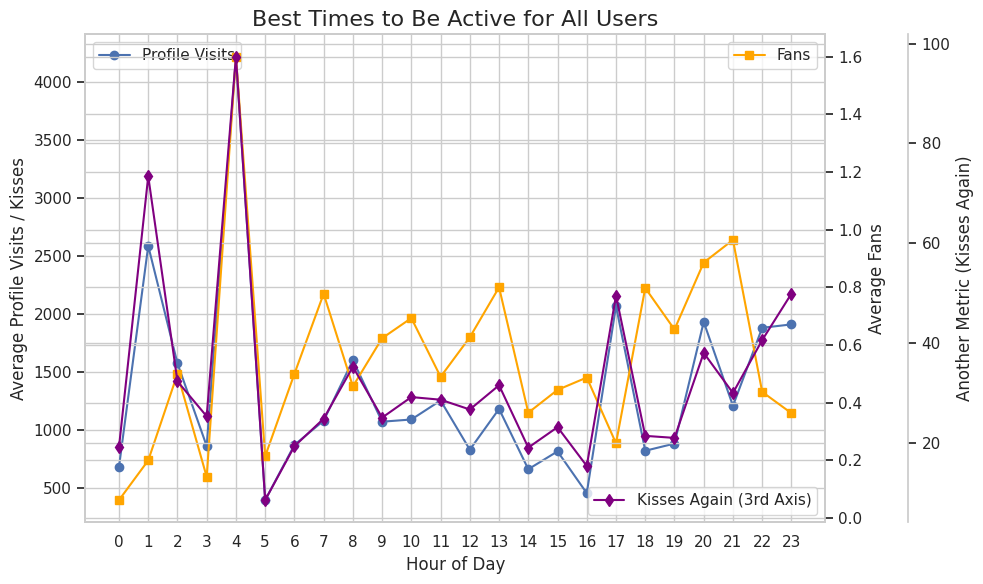

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(non_charismatic_users_timing_analysis.index, non_charismatic_users_timing_analysis['counts_profileVisits'], label='Profile Visits', color='b', marker='o')
ax2 = ax1.twinx()
ax2.plot(non_charismatic_users_timing_analysis.index, non_charismatic_users_timing_analysis['counts_fans'], label='Fans', color='orange', marker='s')
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(non_charismatic_users_timing_analysis.index, non_charismatic_users_timing_analysis['counts_kisses'], label='Kisses Again (3rd Axis)', color='purple', marker='d')

ax1.set_title("Best Times to Be Active for Non Charismatic Users", fontsize=16)
ax1.set_xlabel("Hour of Day", fontsize=12)
ax1.set_ylabel("Average Profile Visits / Kisses", fontsize=12)
ax2.set_ylabel("Average Fans", fontsize=12)
ax3.set_ylabel("Another Metric (Kisses Again)", fontsize=12)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax3.legend(loc="lower right")

ax1.set_xticks(range(24))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When we see the comparison for charismatic users and non charismatic users


*   Charismatic users are mostly active during the night time from 11pm-7am
*   While non charismatic users are active during mid night 3am-5am

where they all get average engagement


4. First Message - Crafting the Perfect Opening Line
- Hypothesis: Users who engage in chats are more likely to receive profile visits and fans.
- Implementation: Analyze the correlation between flirtInterests_chat and engagement metrics.

In [ ]:
first_message_analysis = users_instances[['flirtInterests_chat', 'counts_profileVisits', 'counts_kisses', 'counts_fans']].corr()

print("\n### Impact of First Message ###")
first_message_analysis



### Impact of First Message ###


,flirtInterests_chat,counts_profileVisits,counts_kisses,counts_fans
flirtInterests_chat,1.000000,0.085575,0.068401,-0.021883
counts_profileVisits,0.085575,1.000000,0.885858,0.133878
counts_kisses,0.068401,0.885858,1.000000,0.125454
counts_fans,-0.021883,0.133878,0.125454,1.000000


Chat Interest: Being interested in chats (flirtInterests_chat) has a very weak or negligible correlation with engagement metrics. This indicates that chat interest alone is not a strong driver of profile visits, kisses, or fans.

Engagement Metrics:
- Profile visits strongly correlate with kisses, indicating that driving more visits to a profile is likely to result in more interactions (like kisses).
- Fans have weaker correlations with other metrics, suggesting that gaining fans might depend on factors outside the variables analyzed here.

5. Optimize Profile and Messaging
- Hypothesis: Users who are VIPs, influencers, or have optimized profiles (e.g., verified, highlighted) get more matches and engagement.
- Implementation: Compare engagement metrics for users with statuses like isVip, isInfluencer, verified, and isHighlighted.

In [ ]:
# Analyze impact of user statuses on engagement
optimization_columns = ['isVip', 'verified', 'isHighlighted']
optimization_analysis = {}

for col in optimization_columns:
    status_analysis = charismatic_users.groupby(col)[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
    optimization_analysis[col] = status_analysis

# Print the analysis for each optimization factor
for col, analysis in optimization_analysis.items():
    print(f"\n### Impact of {col} on Engagement ###")
    print(analysis)



### Impact of isVip on Engagement ###
       counts_profileVisits  counts_kisses  counts_fans
isVip                                                  
0               6517.772185     289.476907     4.208095
1               6897.592593     340.185185     3.592593

### Impact of verified on Engagement ###
          counts_profileVisits  counts_kisses  counts_fans
verified                                                  
0                  5411.866120     238.870219     4.091530
1                  9689.061896     438.077369     4.473888

### Impact of isHighlighted on Engagement ###
               counts_profileVisits  counts_kisses  counts_fans
isHighlighted                                                  
0                       6502.767739     289.154160     4.165901
1                       8786.136364     442.681818     6.454545


In [ ]:
# Analyze impact of user statuses on engagement
optimization_columns = ['isVip', 'verified', 'isHighlighted']
optimization_analysis = {}

for col in optimization_columns:
    status_analysis = non_charismatic_users.groupby(col)[['counts_profileVisits', 'counts_kisses', 'counts_fans']].mean()
    optimization_analysis[col] = status_analysis

# Print the analysis for each optimization factor
for col, analysis in optimization_analysis.items():
    print(f"\n### Impact of {col} on Engagement ###")
    print(analysis)



### Impact of isVip on Engagement ###
       counts_profileVisits  counts_kisses  counts_fans
isVip                                                  
0                882.283811      23.190574     0.504098
1               2082.918919      46.756757     0.756757

### Impact of verified on Engagement ###
          counts_profileVisits  counts_kisses  counts_fans
verified                                                  
0                   763.913444      20.888275     0.435850
1                  1541.308333      36.030556     0.838889

### Impact of isHighlighted on Engagement ###
               counts_profileVisits  counts_kisses  counts_fans
isHighlighted                                                  
0                         897.92668      23.511711     0.510183
1                        1430.32000      32.840000     0.400000


Charismaic users are tend to have Vips and isVerified features to gain more engagement

Tips for Making the Best First Impression and Getting More Matches
1. Be Charismatic:

- Profile Presentation: Use a standout, high-quality profile picture that reflects your personality. A smiling, approachable photo can create an instant connection.


2. Leverage Active Hours:

- Be active during peak engagement times (11 PM to 7 AM) to maximize visibility and interaction opportunities.
- Respond promptly to messages during these times to maintain engagement.

3. Increase Profile Visibility:

- Use features like isVip or isHighlighted to improve your profile's visibility in the platform's search or recommendation system.
- Post more pictures to make your profile more dynamic and appealing.

4. Drive Profile Visits:

- Be proactive by engaging with others' profiles through likes, comments, or other features to encourage reciprocal visits.
- Send personalized and thoughtful messages instead of generic ones to increase the chance of a response and a profile visit.

5. Focus Beyond Chat Interest:

- While chat interest is helpful, focus on creating an engaging overall presence rather than relying solely on chat engagement to attract attention.

6. Time Your Efforts:

- If you're a non-charismatic user, focus on improving your profile’s appeal to align with charismatic traits.
- Tailor your activity to overlap with charismatic users' active hours for higher engagement opportunities.